In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
import seaborn as sns 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC,SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV,cross_val_score
import warnings
warnings.filterwarnings("ignore")
# importing libraries

In [2]:
df1=pd.read_csv('sonar.all-data',header=None)



In [3]:
df1

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
5,0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,0.3039,...,0.0045,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062,R
6,0.0317,0.0956,0.1321,0.1408,0.1674,0.1710,0.0731,0.1401,0.2083,0.3513,...,0.0201,0.0248,0.0131,0.0070,0.0138,0.0092,0.0143,0.0036,0.0103,R
7,0.0519,0.0548,0.0842,0.0319,0.1158,0.0922,0.1027,0.0613,0.1465,0.2838,...,0.0081,0.0120,0.0045,0.0121,0.0097,0.0085,0.0047,0.0048,0.0053,R
8,0.0223,0.0375,0.0484,0.0475,0.0647,0.0591,0.0753,0.0098,0.0684,0.1487,...,0.0145,0.0128,0.0145,0.0058,0.0049,0.0065,0.0093,0.0059,0.0022,R
9,0.0164,0.0173,0.0347,0.0070,0.0187,0.0671,0.1056,0.0697,0.0962,0.0251,...,0.0090,0.0223,0.0179,0.0084,0.0068,0.0032,0.0035,0.0056,0.0040,R


In [4]:
df1.shape

(208, 61)

In [5]:
df1[60].describe()

count     208
unique      2
top         M
freq      111
Name: 60, dtype: object

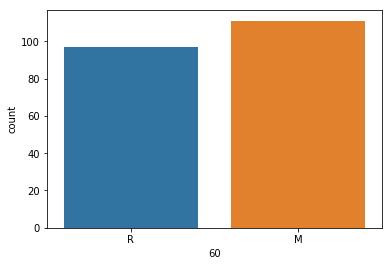

In [6]:
sns.countplot(x=df1[60])

In [7]:
df1[60]=LabelEncoder().fit_transform(df1[60]) # LAST COLUMN IN NUMERIC FORM
df1.shape

(208, 61)

In [8]:
df1[60].describe()

count    208.000000
mean       0.466346
std        0.500070
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: 60, dtype: float64

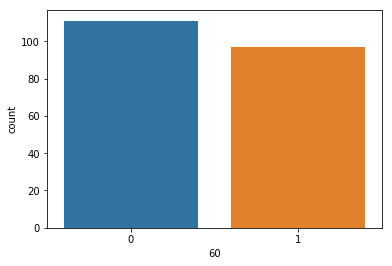

In [9]:
sns.countplot(x=df1[60])

In [10]:
# Pearson coorelation 
coor=df1.corr(method='pearson')


In [11]:
coor

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,1.000000,0.735896,0.571537,0.491438,0.344797,0.238921,0.260815,0.355523,0.353420,0.318276,...,0.355299,0.311729,0.322299,0.312067,0.220642,0.313725,0.368132,0.357116,0.347078,-0.271694
1,0.735896,1.000000,0.779916,0.606684,0.419669,0.332329,0.279040,0.334615,0.316733,0.270782,...,0.434548,0.346076,0.383960,0.380165,0.262263,0.280341,0.353042,0.352200,0.358761,-0.231238
2,0.571537,0.779916,1.000000,0.781786,0.546141,0.346275,0.190434,0.237884,0.252691,0.219637,...,0.394076,0.332914,0.367186,0.289731,0.287661,0.380819,0.334108,0.425047,0.373948,-0.192195
3,0.491438,0.606684,0.781786,1.000000,0.726943,0.352805,0.246440,0.246742,0.247078,0.237769,...,0.374651,0.364772,0.334211,0.284955,0.280938,0.340254,0.344865,0.420266,0.400626,-0.250638
4,0.344797,0.419669,0.546141,0.726943,1.000000,0.597053,0.335422,0.204006,0.177906,0.183219,...,0.266617,0.314985,0.205306,0.196472,0.199323,0.219395,0.238793,0.290982,0.253710,-0.222232
5,0.238921,0.332329,0.346275,0.352805,0.597053,1.000000,0.702889,0.471683,0.327578,0.288621,...,0.252288,0.162404,0.164073,0.133464,0.166758,0.161333,0.203986,0.220573,0.178158,-0.132327
6,0.260815,0.279040,0.190434,0.246440,0.335422,0.702889,1.000000,0.675774,0.470580,0.425448,...,0.144051,0.046403,0.163074,0.195541,0.174143,0.186324,0.242646,0.183578,0.222493,-0.114748
7,0.355523,0.334615,0.237884,0.246742,0.204006,0.471683,0.675774,1.000000,0.778577,0.652525,...,0.219038,0.102447,0.234008,0.239551,0.276819,0.267212,0.287603,0.194400,0.146216,-0.189314
8,0.353420,0.316733,0.252691,0.247078,0.177906,0.327578,0.470580,0.778577,1.000000,0.877131,...,0.207996,0.105352,0.202615,0.179342,0.232764,0.193963,0.231745,0.097293,0.095243,-0.321448
9,0.318276,0.270782,0.219637,0.237769,0.183219,0.288621,0.425448,0.652525,0.877131,1.000000,...,0.165537,0.097544,0.146725,0.175254,0.151889,0.140327,0.212277,0.058273,0.097358,-0.341142


In [12]:
coor[60]

0    -0.271694
1    -0.231238
2    -0.192195
3    -0.250638
4    -0.222232
5    -0.132327
6    -0.114748
7    -0.189314
8    -0.321448
9    -0.341142
10   -0.432855
11   -0.392245
12   -0.312811
13   -0.157277
14   -0.057318
15   -0.011581
16    0.003969
17   -0.014612
18   -0.138204
19   -0.224115
20   -0.242755
21   -0.201361
22   -0.127413
23   -0.074041
24   -0.025306
25   -0.028063
26   -0.054997
27   -0.082486
28   -0.036639
29   -0.004219
        ...   
31    0.055275
32    0.107184
33    0.172010
34    0.227670
35    0.269151
36    0.209055
37    0.040527
38   -0.056910
39    0.035928
40   -0.020942
41   -0.144147
42   -0.234077
43   -0.273779
44   -0.339406
45   -0.305610
46   -0.301697
47   -0.329333
48   -0.351312
49   -0.180224
50   -0.293205
51   -0.288651
52   -0.141871
53   -0.182687
54   -0.095639
55   -0.129341
56   -0.000933
57   -0.184191
58   -0.130826
59   -0.090055
60    1.000000
Name: 60, Length: 61, dtype: float64

In [13]:
del df1[56]
del df1[29]
del df1[16]
del df1[40] 
# ELIMINATING THE COLUMNS WITH NEUTRAL COORELATION 

In [14]:
train_Y=df1[60]
del df1[60]
train_X=df1



In [15]:
train_X.shape

(208, 56)

In [16]:
# splitting the data 
x_train,x_test,y_train,y_test=train_test_split(train_X,train_Y,test_size=0.2,random_state=0)


In [17]:
# Hyperparameter tuning by gridsearch for Random Forest Classifier


rfc = RandomForestClassifier(n_jobs=-1,max_features= 'sqrt' ,n_estimators=50, oob_score = True) 

param_grid = { 
    'n_estimators': [100, 1000],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [100,1000],
    
}

CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(train_X, train_Y)
print (CV_rfc.best_params_)

{'max_depth': 100, 'max_features': 'auto', 'n_estimators': 1000}


In [18]:

model=RandomForestClassifier(max_depth=100,max_features='log2',n_estimators=100,oob_score=True,random_state=42)
model.fit(x_train, y_train)
y_pred1 = model.predict(x_test)
predictions = [round(value) for value in y_pred1]
accuracy = accuracy_score(y_test, predictions)  
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 88.10%


In [19]:
# Hyperparameter tuning by gridsearch for Decision tree classifier
dtc=DecisionTreeClassifier()
param_grid={  'max_depth' : [100,300],
            'min_samples_split' : [2,10],
            'max_leaf_nodes' :[5,100],
             'max_features': ['auto']
    
    
}
CV_dtc=GridSearchCV(estimator=dtc,param_grid=param_grid,cv=4)
CV_dtc.fit(train_X,train_Y)
print (CV_dtc.best_params_)

{'max_depth': 300, 'max_features': 'auto', 'max_leaf_nodes': 100, 'min_samples_split': 10}


In [20]:
model=DecisionTreeClassifier(max_depth=300,random_state=22,max_leaf_nodes=100,min_samples_split=2,max_features='auto')
model.fit(x_train, y_train)
y_pred1 = model.predict(x_test)
predictions = [round(value) for value in y_pred1]
accuracy = accuracy_score(y_test, predictions)  
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 83.33%


In [21]:
# Hyperparameter tuning by gridsearch for SVC
svc=SVC()
param_grid={ 'kernel' : ['rbf','linear'],
            'C': [1, 100],
            'degree' : [0,10],
            'cache_size' : [100,2000]
            
    
    
    
}
cv_svc=GridSearchCV(estimator=svc,param_grid=param_grid,cv=4)
cv_svc.fit(train_X,train_Y)
print (cv_svc.best_params_)

{'C': 1, 'cache_size': 100, 'degree': 0, 'kernel': 'linear'}


In [22]:

model=SVC(C=1,cache_size=100,degree=0,kernel='linear')
model.fit(x_train, y_train)
y_pred1 = model.predict(x_test)
predictions = [round(value) for value in y_pred1]
accuracy = accuracy_score(y_test, predictions)  
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 85.71%
